### Problem Statement 
An education company named X Education sells online courses to industry professionals.The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted.

#### What you need to do?
● X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. 

● The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. 

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [4]:
lead_data=pd.read_csv('Leads.csv')
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
lead_data.shape

(9240, 37)

In [6]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


###  Exploratary data analysis 


In [8]:
lead_data=lead_data.replace('Select',np.nan)

In [9]:
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
# those columns who have one unique values it wont affect our analysis 
lead_data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [11]:
lead_data1=lead_data.drop(['I agree to pay the amount through cheque','Update me on Supply Chain Content','Get updates on DM Content','Receive More Updates About Our Courses','Magazine'],axis=1)


In [12]:
# Checking the percentage of missing values
round(100*(lead_data1.isnull().sum()/len(lead_data1.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [13]:
# removing columns who >= 40 missing values 
lead_data2=lead_data1.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Lead Quality','How did you hear about X Education','Lead Number'],axis=1)

In [14]:
# Rechecking the percentage of missing values
round(100*(lead_data2.isnull().sum()/len(lead_data2.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [15]:
lead_data2.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,No,No,No,No,No,Interested in other courses,NaN,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,No,No,No,No,No,Ringing,NaN,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


In [16]:
## here we have 6 columns missing values but if we remove those coulumns there can be a chance to loss of important missing values so we imputing missing values 
lead_data2['Tags']=lead_data2['Tags'].fillna('not provided')
lead_data2['Country']=lead_data2['Country'].fillna('not provided')
lead_data2['Specialization']=lead_data2['Specialization'].fillna('not provided')
lead_data2['What matters most to you in choosing a course']=lead_data2['What matters most to you in choosing a course'].fillna('not provided')
lead_data2['What is your current occupation']=lead_data2['What is your current occupation'].fillna('not provided')
lead_data2['City']=lead_data2['City'].fillna('not provided')
lead_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [17]:
round(100*(lead_data2.isnull().sum()/len(lead_data2.index)),2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [18]:
lead_data2["Country"].value_counts()

India                   6492
not provided            2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [19]:
round(100*(sum(lead_data2.isnull().sum(axis=1) > 1)/lead_data2.shape[0]),2)

1.48

In [20]:
lead_data3 = lead_data2[lead_data2.isnull().sum(axis=1) <1]
round(100*(lead_data3.shape[0])/(lead_data.shape[0]),2)

98.2

In [21]:
round(100*(lead_data3.isnull().sum()/len(lead_data3.index)), 2)


Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [22]:
for column in lead_data3:
    print(lead_data3[column].astype('category').value_counts())

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
aa9b208a-31f7-456f-8968-beee2b2ab2c7    1
aa708f29-9cb7-4959-a251-8aff9613b024    1
aa7e4871-e2f5-4c6a-887a-040c3a7b80bb    1
aa7f5fc5-f49a-44a7-b870-e7abfbd0fe76    1
                                       ..
537963c8-22d9-459d-8aae-ddac40580ffb    1
53744d5a-0483-42c0-80b0-8990a4d2356d    1
53715ab1-2106-4c4e-8493-81cc465eb9ce    1
536cdc6b-f4c1-449d-bfd8-9ef0ac912dbb    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9074, dtype: int64
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media        

In [23]:
lead_data_final = lead_data3.drop('Prospect ID',1)
lead_data_final.shape

(9074, 23)

### Univariate Analysis 

### Categorical data 

In [24]:
lead_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

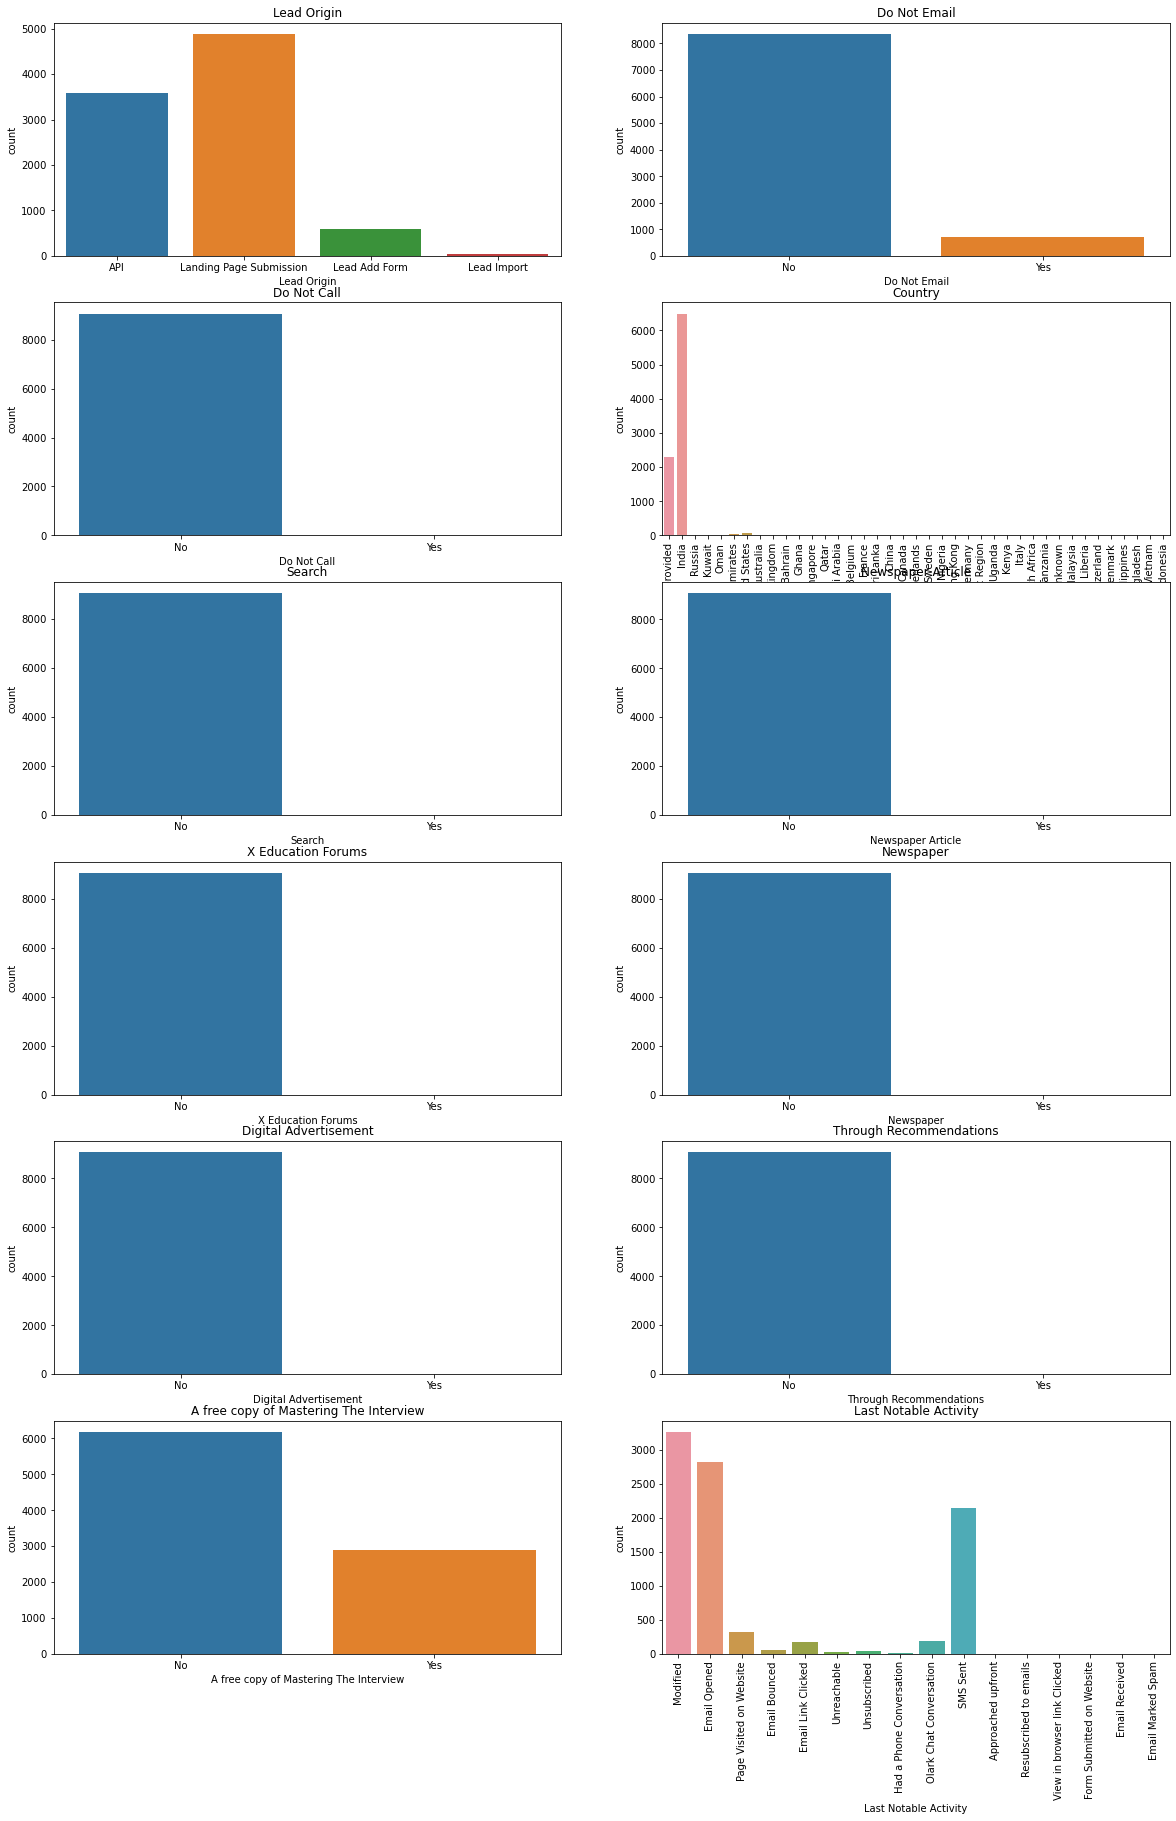

In [25]:
plt.figure(figsize = (20,30))

plt.subplot(6,2,1)
sns.countplot(lead_data_final['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(lead_data_final['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(lead_data_final['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(lead_data_final['Country']).tick_params(axis='x',rotation=90)
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(lead_data_final['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(lead_data_final['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(lead_data_final['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(lead_data_final['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(lead_data_final['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(lead_data_final['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(lead_data_final['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(lead_data_final['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

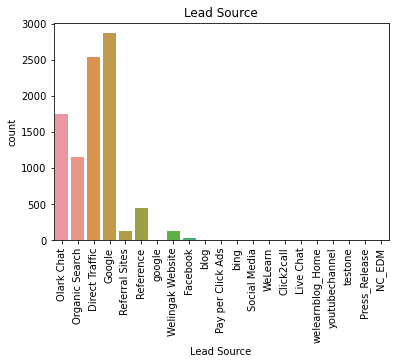

In [26]:
sns.countplot(lead_data_final['Lead Source']).tick_params(axis='x',rotation=90)
plt.title('Lead Source')
plt.show()

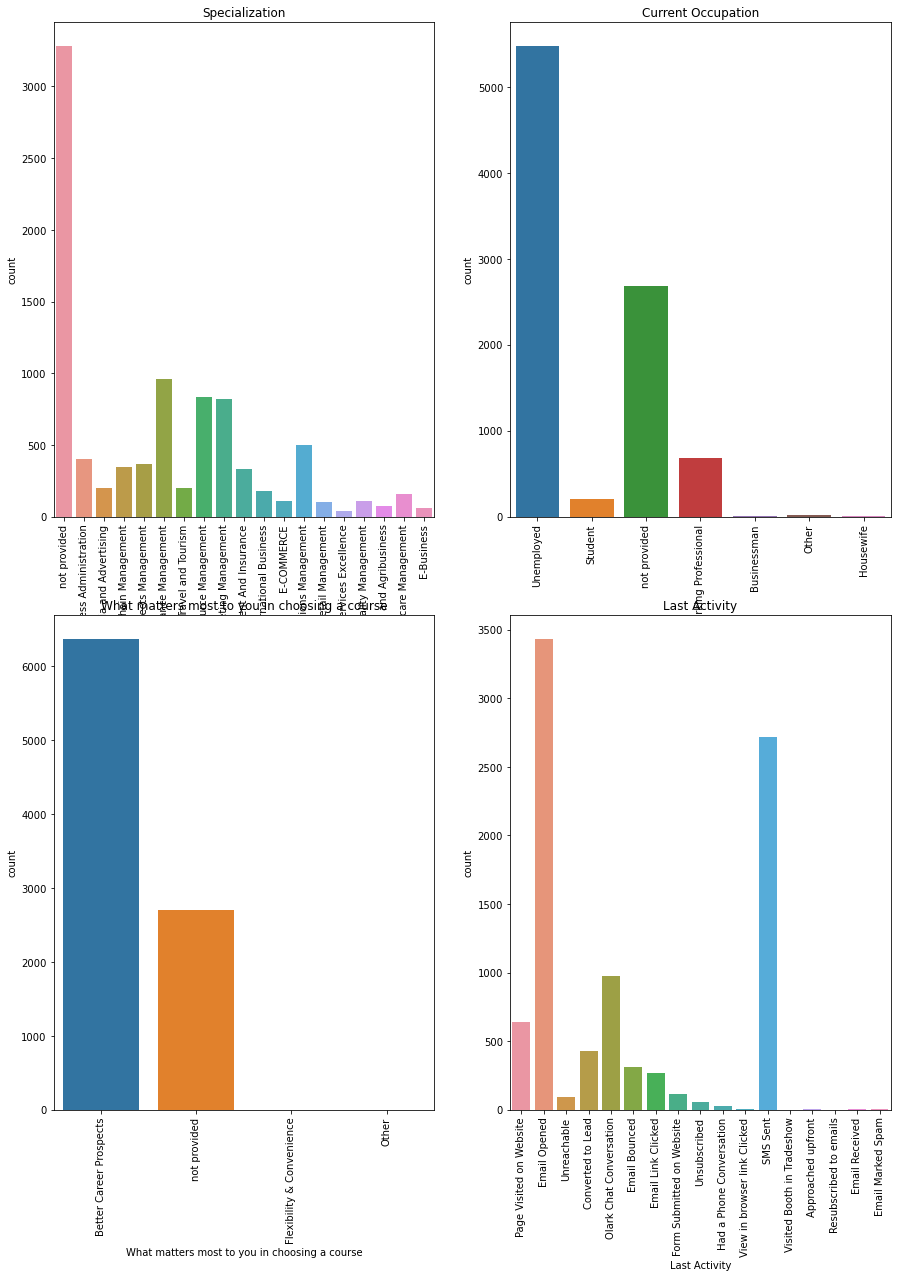

In [27]:
plt.figure(figsize = (15,20))
plt.subplot(2,2,1)
sns.countplot(lead_data_final['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(lead_data_final['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,3)
sns.countplot(lead_data_final['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,4)
sns.countplot(lead_data_final['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

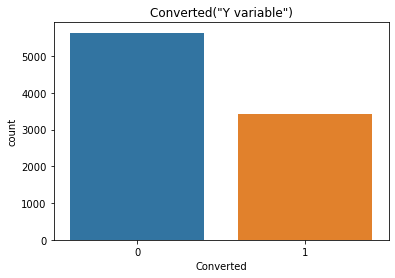

In [28]:
sns.countplot(lead_data_final['Converted'])
plt.title('Converted("Y variable")')
plt.show()

###  Numerical Data Features

In [29]:
lead_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

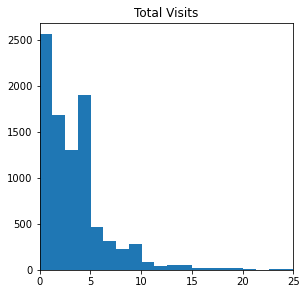

In [30]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.hist(lead_data_final['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)
plt.show()

Text(0.5, 1.0, 'Total Time Spent on Website')

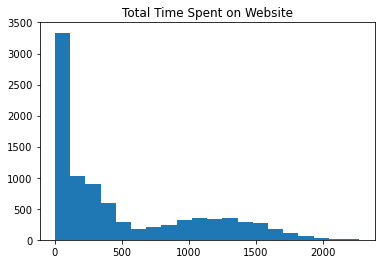

In [31]:
plt.hist(lead_data_final['Total Time Spent on Website'], bins = 20)
plt.title('Total Time Spent on Website')

Text(0.5, 1.0, 'Page Views Per Visit')

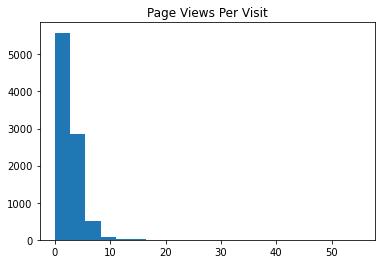

In [32]:
plt.hist(lead_data_final['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')

Text(0.5, 1.0, 'Converted')

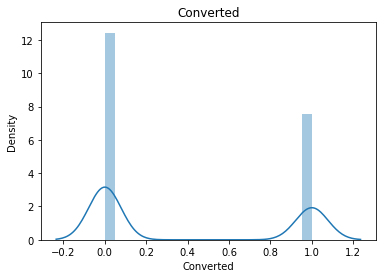

In [33]:
sns.distplot(lead_data_final['Converted'], bins = 20)
plt.title('Converted')

### Relating All Categorical variables to converted 
##### Bivariate graphing 

Text(0.5, 1.0, 'Lead Origin')

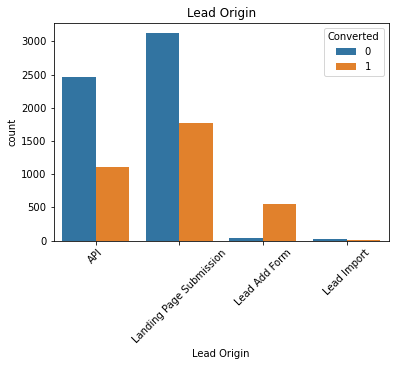

In [34]:
sns.countplot(x='Lead Origin', hue='Converted', data= lead_data_final).tick_params(axis='x', rotation =45)
plt.title('Lead Origin')

Text(0.5, 1.0, 'Lead Source')

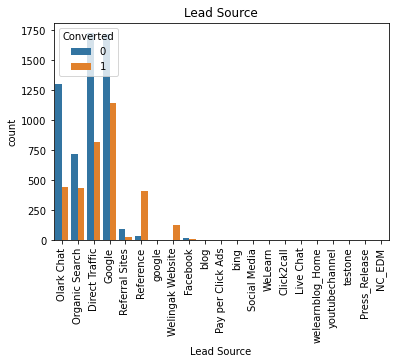

In [35]:
sns.countplot(x='Lead Source', hue='Converted', data= lead_data_final).tick_params(axis='x', rotation =90)
plt.title('Lead Source')

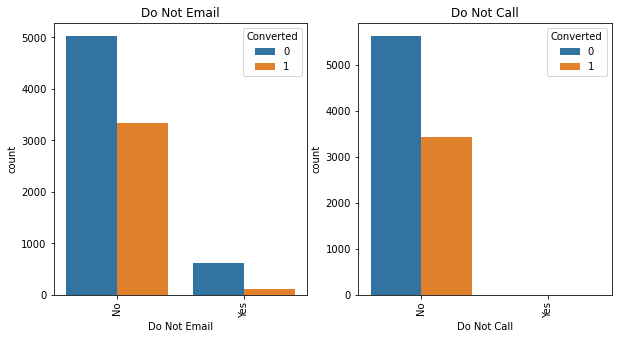

In [36]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data=lead_data_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data=lead_data_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

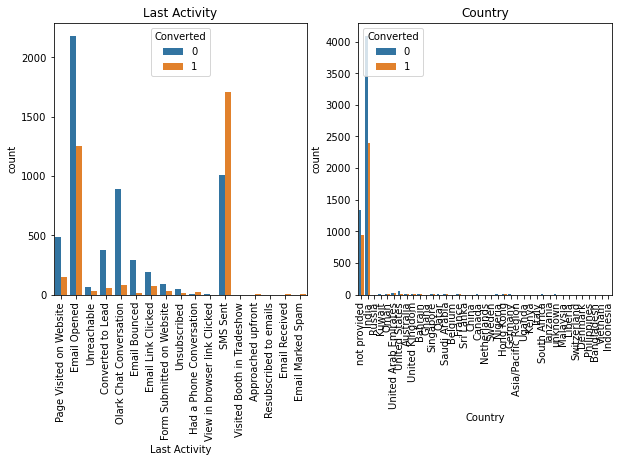

In [37]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data=lead_data_final).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data=lead_data_final).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

### here in country region outside india category is less 

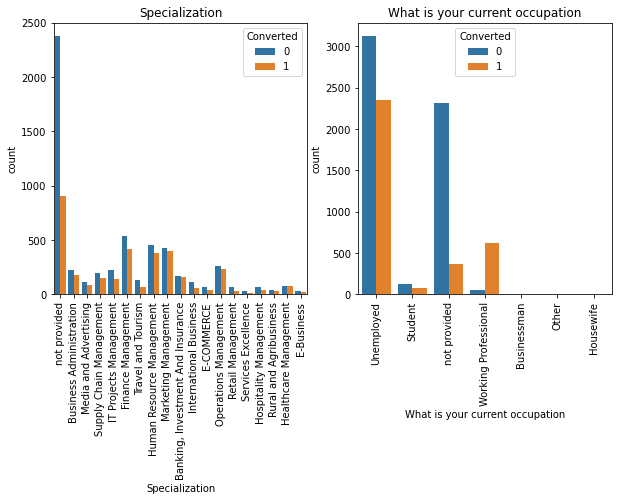

In [38]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data=lead_data_final).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data=lead_data_final).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

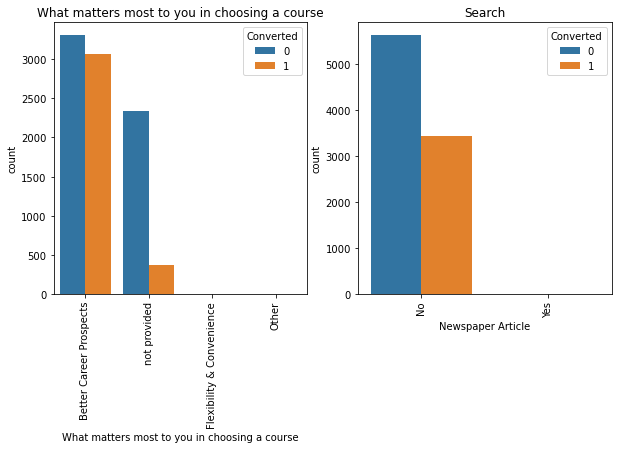

In [39]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data=lead_data_final).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Newspaper Article', hue='Converted', data=lead_data_final).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

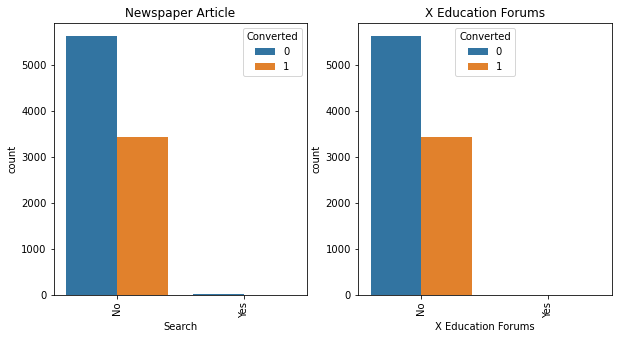

In [40]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Search', hue='Converted', data=lead_data_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data=lead_data_final).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

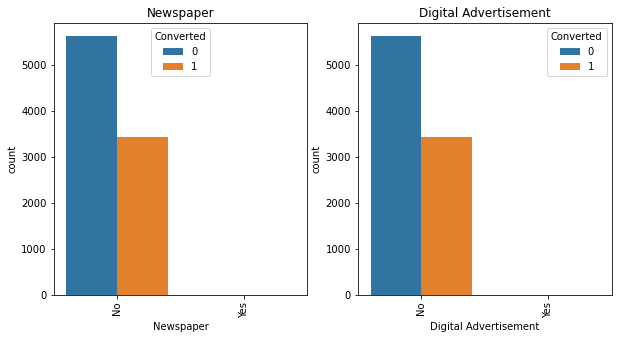

In [41]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data=lead_data_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data=lead_data_final).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()


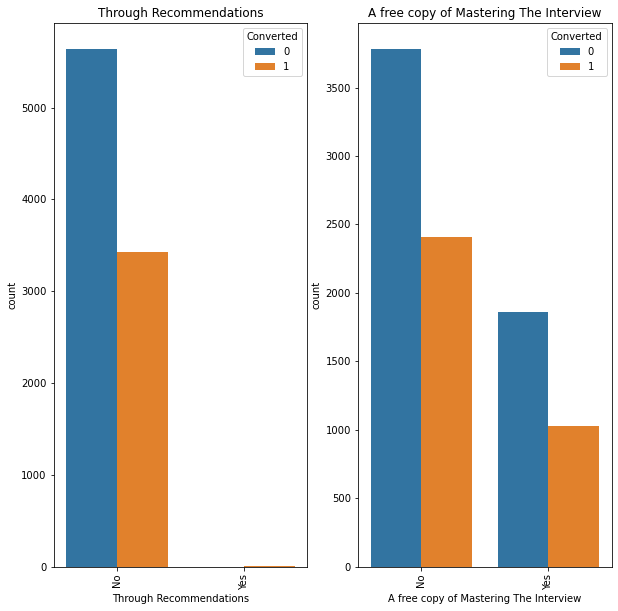

In [42]:
plt.figure(figsize = (10,10))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data=lead_data_final).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data=lead_data_final).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

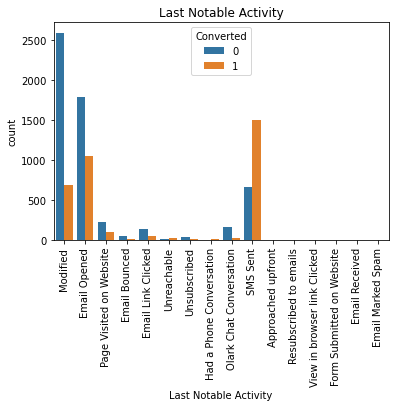

In [43]:
sns.countplot(x='Last Notable Activity', hue='Converted', data=lead_data_final).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

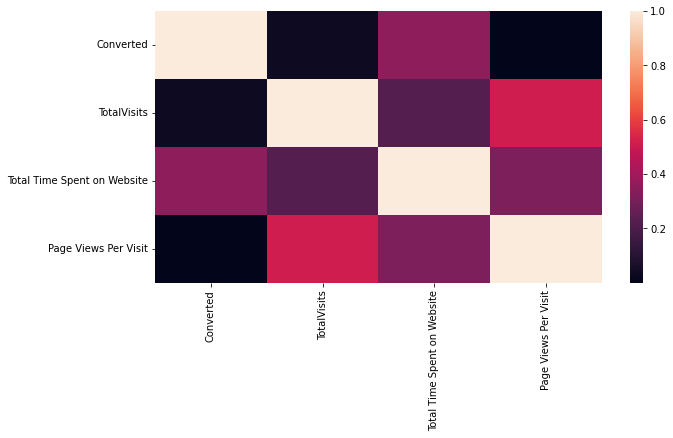

In [44]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(lead_data_final.corr())
plt.show()

In [45]:
numeric =lead_data_final[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


### Dummy variables 

In [46]:
lead_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

In [47]:
lead_data_final.loc[:,lead_data_final.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [48]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(lead_data_final[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
lead_data_final_dum = pd.concat([lead_data_final, dummy], axis=1)
lead_data_final_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,not provided,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,...,0,0,0,0,0,0,0,0,0,0
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,...,0,0,0,0,0,0,1,0,0,0
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,...,0,0,0,0,0,0,1,0,0,0
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,...,0,0,0,0,0,0,1,0,0,0


In [49]:
lead_data_final_dum =lead_data_final_dum.drop(['What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity','Tags','City'], 1)
lead_data_final_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [50]:
lead_data_final_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 82 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9074 non-null   int64  
 1   TotalVisits                                           9074 non-null   float64
 2   Total Time Spent on Website                           9074 non-null   int64  
 3   Page Views Per Visit                                  9074 non-null   float64
 4   Lead Origin_Landing Page Submission                   9074 non-null   uint8  
 5   Lead Origin_Lead Add Form                             9074 non-null   uint8  
 6   Lead Origin_Lead Import                               9074 non-null   uint8  
 7   Specialization_Business Administration                9074 non-null   uint8  
 8   Specialization_E-Business                             9074

In [51]:
## There no objects value in datasets 
lead_data_final_dum.head() 

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


#### Test Train Split

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X =lead_data_final_dum.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [54]:
y=lead_data_final_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [55]:
## split the data set into train and test data sets respectively 70 and 30 percent
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0.007968,0.178347,0.083333,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1012,0.007968,0.085355,0.083333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0.007968,0.619946,0.083333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0.019920,0.711590,0.104167,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


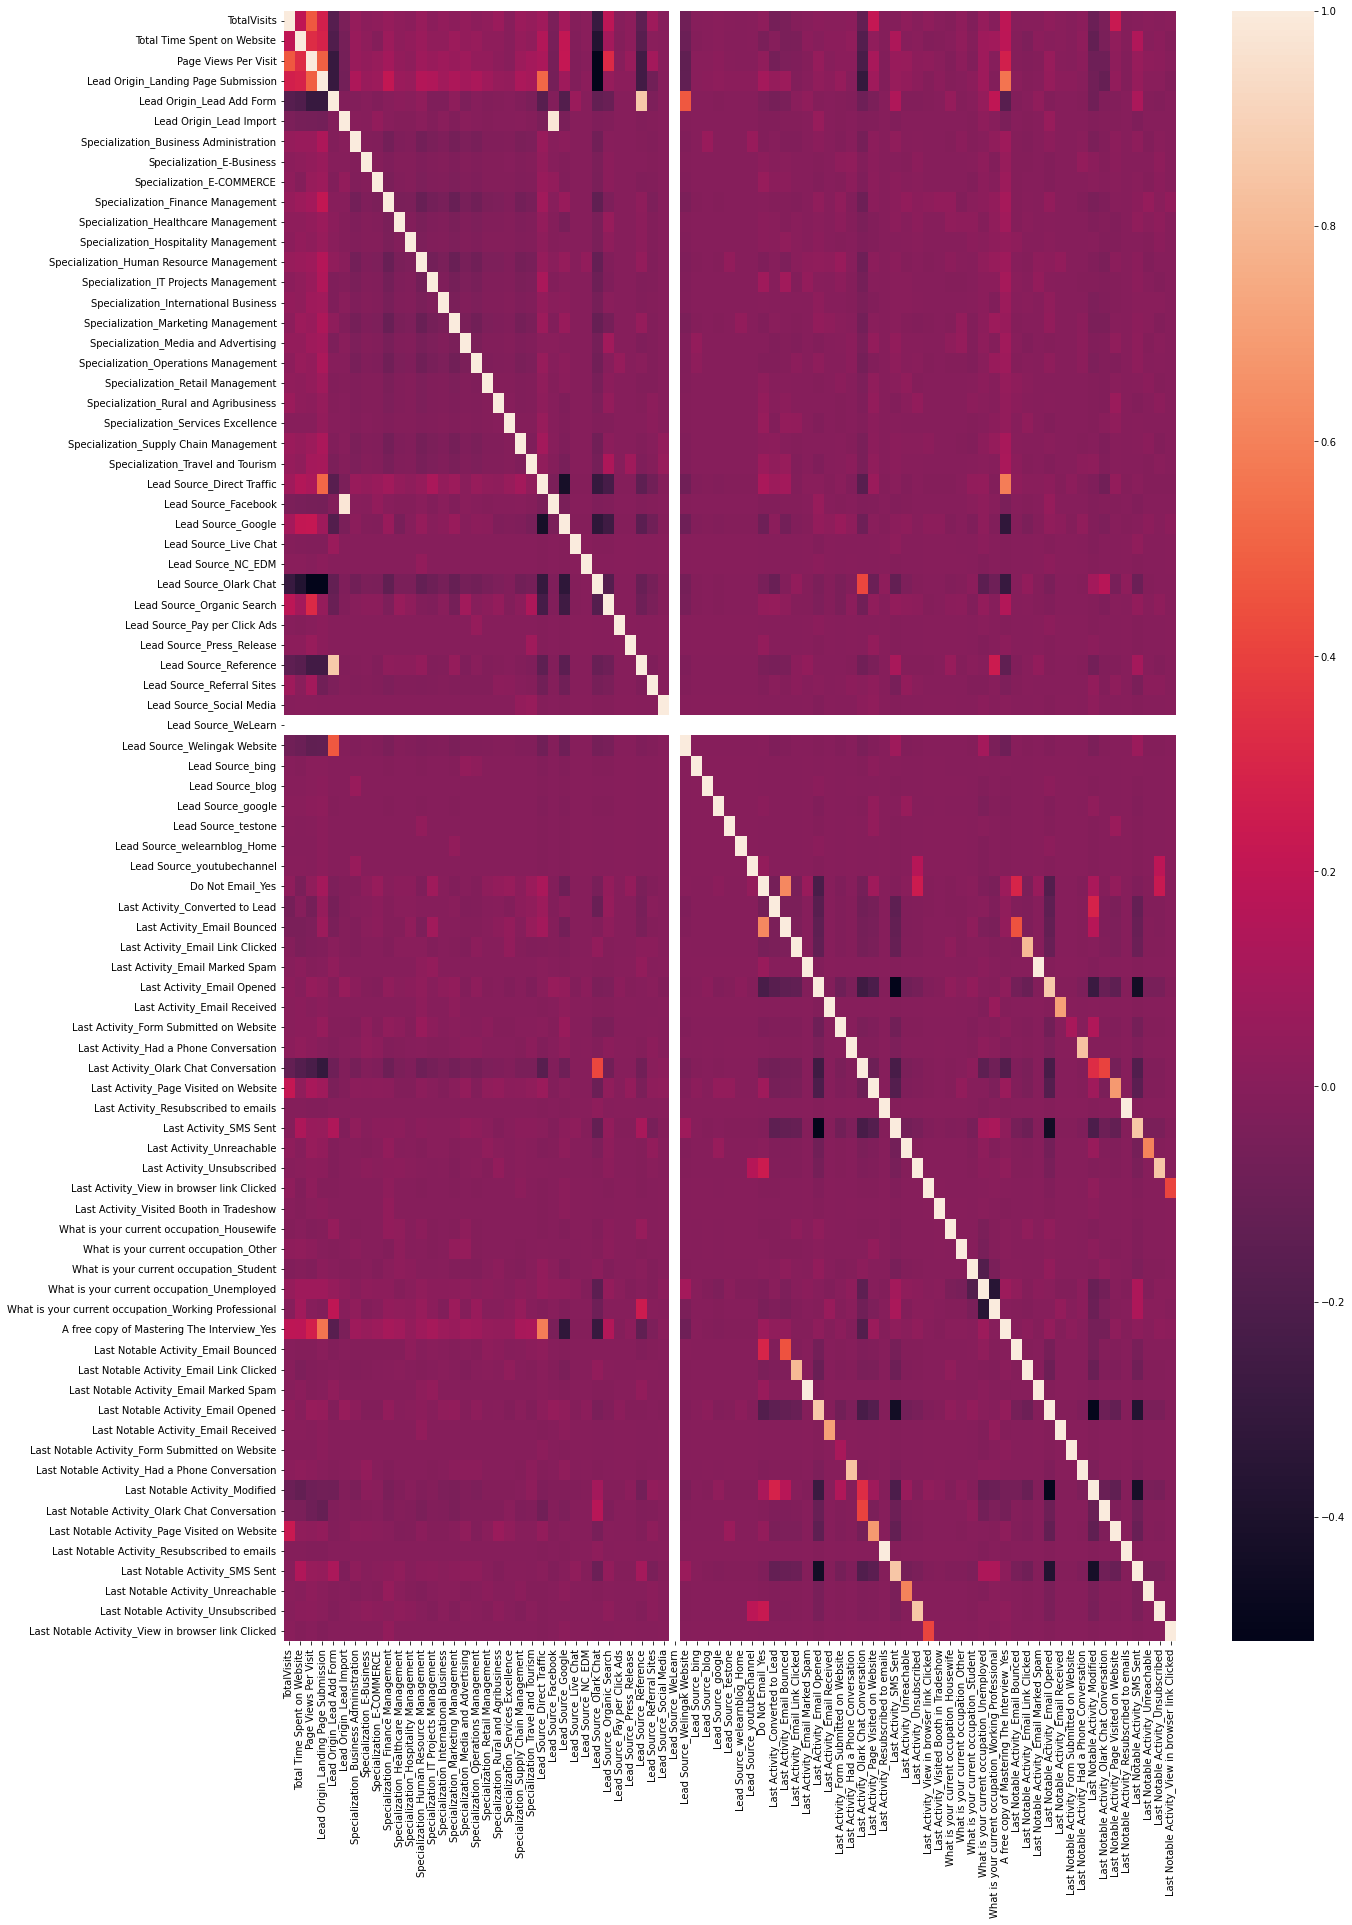

In [58]:
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

### there are lot of variables so we required to first perfrom rfe on data set 


## Model Building 

In [84]:
from sklearn.linear_model import LogisticRegression 
logreg_m=LogisticRegression()

In [85]:
from sklearn.feature_selection import RFE

In [86]:
# Running RFE with 15 variables as output
rfe = RFE(logreg_m,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [87]:
## variables which are part of selected by rfe 
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Total Time Spent on Website', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Source_Direct Traffic', True, 1),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('Last Notable Activity_Email Link Clicked', True, 1),
 ('Last Notable Activity_Email Opened', True, 1),
 ('Last Notable Activity_Modified', True, 1),
 ('Last Notable Activity_Olark Chat Conversation', True, 1),
 ('Last Notable Activity_Page Visited on Website', True, 1)]

In [88]:
## adding all variables are in col 
col = X_train.columns[rfe.support_]

In [89]:
X_train = X_train[col]

In [90]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
logm_1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm_1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2712.4
Date:                Wed, 19 Oct 2022   Deviance:                       5424.8
Time:                        11:04:16   Pearson chi2:                 6.47e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3805
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2679      0.076     -3.533      0.000      -0.417      -0.119
Total Time Spent on Website                              3.9205      0.144     27.156      0.000       3.638       4.203
Lead Origin_Lead Add Form                                3.8136      0.209     18.258      0.000       3.404       4.223
Lead Source_Direct Traffic                              -0.5364      0.077     -6.941      0.000      -0.688      -0.385
Do Not Email_Yes                                        -1.8149      0.173    -10.507      0.000      -2.153      -1.476
Last Activity_Olark Chat Conversation                   -0.8256      0.187     -4.404      0.000      -1.193      -0.458
What is your current occupation_Working Professional     2.6461      0.186     14.251      0.000       2.282       3.010
Last Notable Activity_Email Link Clicked                -1.7390      0.257     -6.759      0.000      -2.243      -1.235
Last Notable Activity_Email Opened                      -1.3893      0.087    -16.004      0.000      -1.559      -1.219
Last Notable Activity_Modified                          -1.9309      0.095    -20.399      0.000      -2.116      -1.745
Last Notable Activity_Olark Chat Conversation           -1.5930      0.362     -4.403      0.000      -2.302      -0.884
Last Notable Activity_Page Visited on Website           -1.6979      0.196     -8.673      0.000      -2.082      -1.314
========================================================================================================================
"""

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [92]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Last Notable Activity_Modified,1.73
4,Last Activity_Olark Chat Conversation,1.68
0,Total Time Spent on Website,1.56
2,Lead Source_Direct Traffic,1.43
9,Last Notable Activity_Olark Chat Conversation,1.32
7,Last Notable Activity_Email Opened,1.29
5,What is your current occupation_Working Profes...,1.14
3,Do Not Email_Yes,1.13
1,Lead Origin_Lead Add Form,1.12
10,Last Notable Activity_Page Visited on Website,1.05


In [93]:
X_train.drop('Last Activity_Had a Phone Conversation', axis = 1, inplace = True)

KeyError: "['Last Activity_Had a Phone Conversation'] not found in axis"

In [94]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2712.4
Date:                Wed, 19 Oct 2022   Deviance:                       5424.8
Time:                        11:04:20   Pearson chi2:                 6.47e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3805
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2679      0.076     -3.533      0.000      -0.417      -0.119
Total Time Spent on Website                              3.9205      0.144     27.156      0.000       3.638       4.203
Lead Origin_Lead Add Form                                3.8136      0.209     18.258      0.000       3.404       4.223
Lead Source_Direct Traffic                              -0.5364      0.077     -6.941      0.000      -0.688      -0.385
Do Not Email_Yes                                        -1.8149      0.173    -10.507      0.000      -2.153      -1.476
Last Activity_Olark Chat Conversation                   -0.8256      0.187     -4.404      0.000      -1.193      -0.458
What is your current occupation_Working Professional     2.6461      0.186     14.251      0.000       2.282       3.010
Last Notable Activity_Email Link Clicked                -1.7390      0.257     -6.759      0.000      -2.243      -1.235
Last Notable Activity_Email Opened                      -1.3893      0.087    -16.004      0.000      -1.559      -1.219
Last Notable Activity_Modified                          -1.9309      0.095    -20.399      0.000      -2.116      -1.745
Last Notable Activity_Olark Chat Conversation           -1.5930      0.362     -4.403      0.000      -2.302      -0.884
Last Notable Activity_Page Visited on Website           -1.6979      0.196     -8.673      0.000      -2.082      -1.314
========================================================================================================================
"""

In [95]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Last Notable Activity_Modified,1.73
4,Last Activity_Olark Chat Conversation,1.68
0,Total Time Spent on Website,1.56
2,Lead Source_Direct Traffic,1.43
9,Last Notable Activity_Olark Chat Conversation,1.32
7,Last Notable Activity_Email Opened,1.29
5,What is your current occupation_Working Profes...,1.14
3,Do Not Email_Yes,1.13
1,Lead Origin_Lead Add Form,1.12
10,Last Notable Activity_Page Visited on Website,1.05


#### here Lead Source_Welingak Website have high p values but low vif but p value is high so we will drop Lead Source_Welingak Website


In [96]:
X_train.drop('Lead Source_Welingak Website', axis = 1, inplace = True)

KeyError: "['Lead Source_Welingak Website'] not found in axis"

In [81]:
X_train_sm = sm.add_constant(X_train)
logm_3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm_3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2712.4
Date:                Wed, 19 Oct 2022   Deviance:                       5424.8
Time:                        11:02:46   Pearson chi2:                 6.47e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3805
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2679      0.076     -3.533      0.000      -0.417      -0.119
Total Time Spent on Website                              3.9205      0.144     27.156      0.000       3.638       4.203
Lead Origin_Lead Add Form                                3.8136      0.209     18.258      0.000       3.404       4.223
Lead Source_Direct Traffic                              -0.5364      0.077     -6.941      0.000      -0.688      -0.385
Do Not Email_Yes                                        -1.8149      0.173    -10.507      0.000      -2.153      -1.476
Last Activity_Olark Chat Conversation                   -0.8256      0.187     -4.404      0.000      -1.193      -0.458
What is your current occupation_Working Professional     2.6461      0.186     14.251      0.000       2.282       3.010
Last Notable Activity_Email Link Clicked                -1.7390      0.257     -6.759      0.000      -2.243      -1.235
Last Notable Activity_Email Opened                      -1.3893      0.087    -16.004      0.000      -1.559      -1.219
Last Notable Activity_Modified                          -1.9309      0.095    -20.399      0.000      -2.116      -1.745
Last Notable Activity_Olark Chat Conversation           -1.5930      0.362     -4.403      0.000      -2.302      -0.884
Last Notable Activity_Page Visited on Website           -1.6979      0.196     -8.673      0.000      -2.082      -1.314
========================================================================================================================
"""

In [82]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Last Notable Activity_Modified,1.73
4,Last Activity_Olark Chat Conversation,1.68
0,Total Time Spent on Website,1.56
2,Lead Source_Direct Traffic,1.43
9,Last Notable Activity_Olark Chat Conversation,1.32
7,Last Notable Activity_Email Opened,1.29
5,What is your current occupation_Working Profes...,1.14
3,Do Not Email_Yes,1.13
1,Lead Origin_Lead Add Form,1.12
10,Last Notable Activity_Page Visited on Website,1.05


### last activity had a phone converastion has a high p values compared to other variables 

In [148]:
X_train.drop('Last Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [149]:
X_train_sm = sm.add_constant(X_train)
logm_4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm_4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2706.3
Date:                Tue, 18 Oct 2022   Deviance:                       5412.6
Time:                        21:58:41   Pearson chi2:                 6.26e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3817
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2674      0.076     -3.523      0.000      -0.416      -0.119
Total Time Spent on Website                              3.9223      0.144     27.156      0.000       3.639       4.205
Lead Origin_Lead Add Form                                3.4522      0.219     15.766      0.000       3.023       3.881
Lead Source_Direct Traffic                              -0.5363      0.077     -6.937      0.000      -0.688      -0.385
Lead Source_Welingak Website                             2.0698      0.759      2.729      0.006       0.583       3.556
Do Not Email_Yes                                        -1.8412      0.175    -10.528      0.000      -2.184      -1.498
Last Activity_Olark Chat Conversation                   -0.8226      0.187     -4.392      0.000      -1.190      -0.455
What is your current occupation_Working Professional     2.6584      0.185     14.337      0.000       2.295       3.022
Last Notable Activity_Email Link Clicked                -1.7319      0.256     -6.754      0.000      -2.234      -1.229
Last Notable Activity_Email Opened                      -1.3889      0.087    -15.993      0.000      -1.559      -1.219
Last Notable Activity_Modified                          -1.9326      0.095    -20.385      0.000      -2.118      -1.747
Last Notable Activity_Olark Chat Conversation           -1.6129      0.364     -4.426      0.000      -2.327      -0.899
Last Notable Activity_Page Visited on Website           -1.7017      0.196     -8.673      0.000      -2.086      -1.317
========================================================================================================================
"""

In [150]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Last Notable Activity_Modified,1.73
5,Last Activity_Olark Chat Conversation,1.68
0,Total Time Spent on Website,1.56
1,Lead Origin_Lead Add Form,1.47
2,Lead Source_Direct Traffic,1.43
3,Lead Source_Welingak Website,1.33
10,Last Notable Activity_Olark Chat Conversation,1.32
8,Last Notable Activity_Email Opened,1.29
6,What is your current occupation_Working Profes...,1.17
4,Do Not Email_Yes,1.13


### vif values of Lead Source_Welingak Website id 1.33 but p values is high so its less significant we will drop this column 

In [151]:
X_train.drop('Lead Source_Welingak Website', axis = 1, inplace = True)

In [152]:
X_train_sm = sm.add_constant(X_train)
logm_5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm_5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2712.4
Date:                Tue, 18 Oct 2022   Deviance:                       5424.8
Time:                        22:04:17   Pearson chi2:                 6.47e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3805
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2679      0.076     -3.533      0.000      -0.417      -0.119
Total Time Spent on Website                              3.9205      0.144     27.156      0.000       3.638       4.203
Lead Origin_Lead Add Form                                3.8136      0.209     18.258      0.000       3.404       4.223
Lead Source_Direct Traffic                              -0.5364      0.077     -6.941      0.000      -0.688      -0.385
Do Not Email_Yes                                        -1.8149      0.173    -10.507      0.000      -2.153      -1.476
Last Activity_Olark Chat Conversation                   -0.8256      0.187     -4.404      0.000      -1.193      -0.458
What is your current occupation_Working Professional     2.6461      0.186     14.251      0.000       2.282       3.010
Last Notable Activity_Email Link Clicked                -1.7390      0.257     -6.759      0.000      -2.243      -1.235
Last Notable Activity_Email Opened                      -1.3893      0.087    -16.004      0.000      -1.559      -1.219
Last Notable Activity_Modified                          -1.9309      0.095    -20.399      0.000      -2.116      -1.745
Last Notable Activity_Olark Chat Conversation           -1.5930      0.362     -4.403      0.000      -2.302      -0.884
Last Notable Activity_Page Visited on Website           -1.6979      0.196     -8.673      0.000      -2.082      -1.314
========================================================================================================================
"""

In [153]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Last Notable Activity_Modified,1.73
4,Last Activity_Olark Chat Conversation,1.68
0,Total Time Spent on Website,1.56
2,Lead Source_Direct Traffic,1.43
9,Last Notable Activity_Olark Chat Conversation,1.32
7,Last Notable Activity_Email Opened,1.29
5,What is your current occupation_Working Profes...,1.14
3,Do Not Email_Yes,1.13
1,Lead Origin_Lead Add Form,1.12
10,Last Notable Activity_Page Visited on Website,1.05


### here we have  perfect data sets based om technical criteria 

## Creating prediction 

In [154]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.183250
1012    0.589398
9226    0.099856
4750    0.835637
7987    0.513629
1281    0.812311
2880    0.161080
4971    0.917786
7536    0.784150
1248    0.475346
dtype: float64

In [155]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18324984, 0.5893976 , 0.09985604, 0.83563681, 0.51362883,
       0.8123112 , 0.16107971, 0.91778594, 0.78414985, 0.47534555])

In [156]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.183250
1,0,0.589398
2,0,0.099856
3,1,0.835637
4,1,0.513629


In [157]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.183250,0
1,0,0.589398,1
2,0,0.099856,0
3,1,0.835637,1
4,1,0.513629,1


### Model Evaluation 

In [158]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3431,  474],
       [ 836, 1610]], dtype=int64)

In [160]:
#overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7937332703511258

In [161]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [166]:
## check value of sensitivity 
TP/(TP+FN)

0.6582174979558463

In [167]:
## specifiticity
TN/(TN+FP)

0.8786171574903969

### __we have sensitivity is 65 % , accuracy is 79%  and Specificity is 87%

### ROC curve 

In [168]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [169]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

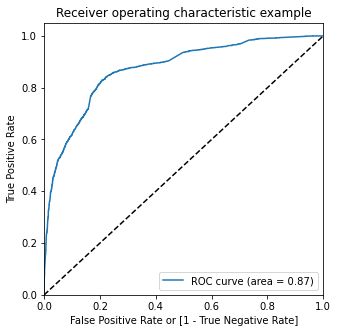

In [170]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### Area is 0.87 is a good value 

In [171]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.183250,0,1,1,0,0,0,0,0,0,0,0
1,0,0.589398,1,1,1,1,1,1,1,0,0,0,0
2,0,0.099856,0,1,0,0,0,0,0,0,0,0,0
3,1,0.835637,1,1,1,1,1,1,1,1,1,1,0
4,1,0.513629,1,1,1,1,1,1,1,0,0,0,0


In [173]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.385136,1.000000,0.000000
0.1,0.1,0.555346,0.970564,0.295262
0.2,0.2,0.746339,0.882257,0.661204
0.3,0.3,0.799087,0.848324,0.768246
0.4,0.4,0.806802,0.789861,0.817414
0.5,0.5,0.793733,0.658217,0.878617
0.6,0.6,0.789954,0.575634,0.924200
0.7,0.7,0.781452,0.505315,0.954417
0.8,0.8,0.761455,0.427228,0.970807
0.9,0.9,0.703511,0.246934,0.989501


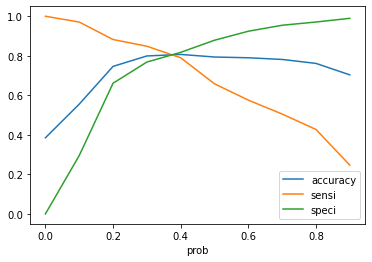

In [175]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### here it is visible that optimal cutoff is 0.35

In [207]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.38 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.183250,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.589398,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.099856,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.835637,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.513629,1,1,1,1,1,1,1,0,0,0,0,1


In [208]:
## overall accuracy 
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8074319004881121

In [209]:
## confusion matrics 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3164,  741],
       [ 482, 1964]], dtype=int64)

In [210]:
##Tp= true positive, tn = true negative , fp= false positive , fn= false negative 
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1] 
FN = confusion2[1,0]


In [211]:
# sensitivity 
TP/(TP+FN)

0.802943581357318

In [212]:
## specificity 
TN/(TN+FP)

0.8102432778489117

### prediction of test data sets 

In [216]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [217]:
col = X_train.columns

In [218]:
X_test = X_test[col
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Do Not Email_Yes,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3271,1.0,0.070530,0,0,0,0,0,0,1,0,0,0
1490,1.0,0.679695,0,1,0,0,1,0,1,0,0,0
7936,1.0,0.033243,0,0,0,0,0,0,1,0,0,0
4216,1.0,0.000000,1,0,0,0,0,0,0,1,0,0
3830,1.0,0.073675,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
850,1.0,0.372417,0,0,0,0,0,0,0,1,0,0
2879,1.0,0.264600,0,0,0,0,0,0,0,1,0,0
6501,1.0,0.599730,0,1,0,0,0,0,0,0,0,0
7155,1.0,0.231357,0,1,0,0,0,0,0,1,0,0


In [220]:
y_test_predicted = res.predict(X_test_sm)

In [2]:
y_pred_df = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)

y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_final= y_pred_final.rename(columns = {0 : 'converted_prob'})
y_pred_final.head()

NameError: name 'pd' is not defined

In [1]:
y_test_df['Prospect ID'] = y_test_df.index

NameError: name 'y_test_df' is not defined

### lead score 

In [231]:
y_pred_final = y_pred_final[['Converted','converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.converted_prob.map( lambda x: round(x*100))

In [232]:
y_pred_final.head()

,Converted,converted_prob,Lead_Score
0,0,0.200889,20
1,1,0.957596,96
2,0,0.178443,18
3,1,0.834077,83
4,0,0.202875,20
